<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Course/blob/main/8_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/Colab Notebooks/Python_Course/PyTorch_Course/NTC_Stock.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Date,High,Low,Close,noOfTransactions,Volume,amount,Open,differenceRs,percentChange
0,2022-01-02,1341.0,1283.0,1325.0,327,79727,103884333.1,1283.0,42.0,3.27
1,2022-01-03,1335.0,1301.1,1317.0,227,29864,39305624.3,1325.0,-8.0,-0.60
2,2022-01-04,1329.0,1293.0,1315.0,166,22367,29360024.6,1317.0,-2.0,-0.15
3,2022-01-05,1346.4,1301.0,1313.0,377,59319,78308616.3,1315.0,-2.0,-0.15
4,2022-01-06,1334.0,1300.6,1331.0,411,56637,74856032.1,1313.0,18.0,1.37


In [5]:
# Set the 'Name' column as the index
df.set_index('Date', inplace=True)

In [6]:
df.head()

,High,Low,Close,noOfTransactions,Volume,amount,Open,differenceRs,percentChange
Date,,,,,,,,,
2022-01-02,1341.0,1283.0,1325.0,327,79727,103884333.1,1283.0,42.0,3.27
2022-01-03,1335.0,1301.1,1317.0,227,29864,39305624.3,1325.0,-8.0,-0.60
2022-01-04,1329.0,1293.0,1315.0,166,22367,29360024.6,1317.0,-2.0,-0.15
2022-01-05,1346.4,1301.0,1313.0,377,59319,78308616.3,1315.0,-2.0,-0.15
2022-01-06,1334.0,1300.6,1331.0,411,56637,74856032.1,1313.0,18.0,1.37


<Axes: xlabel='Date'>

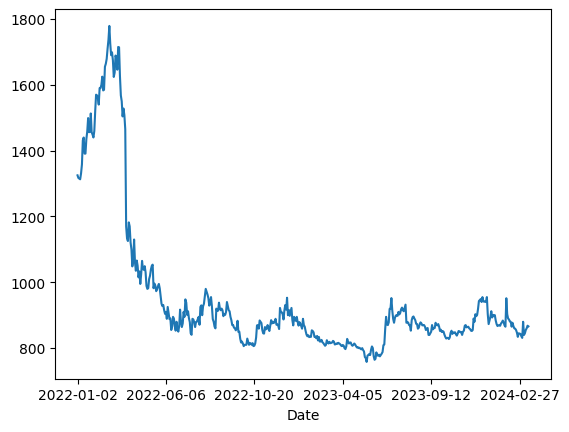

In [7]:
df['Close'].plot()

In [8]:
import numpy as np

In [9]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [10]:
# Prepare data for RNN
sequence_length = 5
X = []
y = []
for i in range(len(df) - sequence_length):
    X.append(df.iloc[i:i + sequence_length]['Close'].values)
    y.append(df.iloc[i + sequence_length]['Close'])

X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

In [13]:
# Split data into training and testing sets
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [14]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [15]:
# Instantiate the model
input_size = 1  # Size of each input sample
hidden_size = 64  # Number of features in the hidden state
output_size = 1  # Size of each output sample
model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [16]:
# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor.unsqueeze(2))  # Unsqueezing to add the third dimension
    optimizer.zero_grad()
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 1.3764
Epoch [2/50], Loss: 1.3053
Epoch [3/50], Loss: 1.2376
Epoch [4/50], Loss: 1.1726
Epoch [5/50], Loss: 1.1096
Epoch [6/50], Loss: 1.0480
Epoch [7/50], Loss: 0.9874
Epoch [8/50], Loss: 0.9274
Epoch [9/50], Loss: 0.8678
Epoch [10/50], Loss: 0.8086
Epoch [11/50], Loss: 0.7495
Epoch [12/50], Loss: 0.6902
Epoch [13/50], Loss: 0.6306
Epoch [14/50], Loss: 0.5705
Epoch [15/50], Loss: 0.5099
Epoch [16/50], Loss: 0.4491
Epoch [17/50], Loss: 0.3887
Epoch [18/50], Loss: 0.3295
Epoch [19/50], Loss: 0.2730
Epoch [20/50], Loss: 0.2211
Epoch [21/50], Loss: 0.1761
Epoch [22/50], Loss: 0.1404
Epoch [23/50], Loss: 0.1154
Epoch [24/50], Loss: 0.1007
Epoch [25/50], Loss: 0.0944
Epoch [26/50], Loss: 0.0940
Epoch [27/50], Loss: 0.0970
Epoch [28/50], Loss: 0.1020
Epoch [29/50], Loss: 0.1088
Epoch [30/50], Loss: 0.1170
Epoch [31/50], Loss: 0.1244
Epoch [32/50], Loss: 0.1270
Epoch [33/50], Loss: 0.1228
Epoch [34/50], Loss: 0.1131
Epoch [35/50], Loss: 0.1006
Epoch [36/50], Loss: 0.0881
E

In [17]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor.unsqueeze(2))
    test_loss = criterion(outputs.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 0.0072


#Save the model

In [18]:
# Save the trained model weights
torch.save(model.state_dict(), 'model_weights.pth')

#Using the saved model

In [19]:
# Scale the 'Value' column using StandardScaler
scaler = StandardScaler()
df['Value_scaled'] = scaler.fit_transform(df[['Close']])

# Prepare data for feeding into the model
sequence_length = 5
X = []
for i in range(len(df) - sequence_length + 1):
    X.append(df['Value_scaled'].iloc[i:i + sequence_length].values)

# Convert to numpy array and then to PyTorch tensor
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(2)  # Add a third dimension



<ipython-input-19-e1d119f79eb7>:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(2)  # Add a third dimension


In [20]:
# Load the trained model weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

RNN(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [21]:
# Make predictions for the entire DataFrame
with torch.no_grad():
    forecast = []
    for i in range(len(X_tensor)):
        output = model(X_tensor[i].unsqueeze(0))  # Unsqueezing to add the batch dimension
        forecast.append(output.item())

In [22]:
# Inverse transform the forecasted values to get back to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Add the 'Forecast' column to the DataFrame
df['Forecast'] = np.nan
df['Forecast'].iloc[sequence_length-1:] = forecast

print(df)

              High     Low   Close  noOfTransactions  Volume       amount  \
Date                                                                        
2022-01-02  1341.0  1283.0  1325.0               327   79727  103884333.1   
2022-01-03  1335.0  1301.1  1317.0               227   29864   39305624.3   
2022-01-04  1329.0  1293.0  1315.0               166   22367   29360024.6   
2022-01-05  1346.4  1301.0  1313.0               377   59319   78308616.3   
2022-01-06  1334.0  1300.6  1331.0               411   56637   74856032.1   
...            ...     ...     ...               ...     ...          ...   
2024-03-06   856.8   837.1   845.0               226   14915   12584435.8   
2024-03-07   865.0   845.0   855.0               246   13007   11128791.6   
2024-03-10   872.0   856.0   859.9               212   10552    9067195.5   
2024-03-12   877.0   859.0   868.0               377   24704   21384289.7   
2024-03-13   885.3   856.0   866.0               308   18601   16165487.5   

<ipython-input-22-c61b135886bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'].iloc[sequence_length-1:] = forecast


In [23]:
df_final = df[['Close','Forecast']]

<Axes: xlabel='Date'>

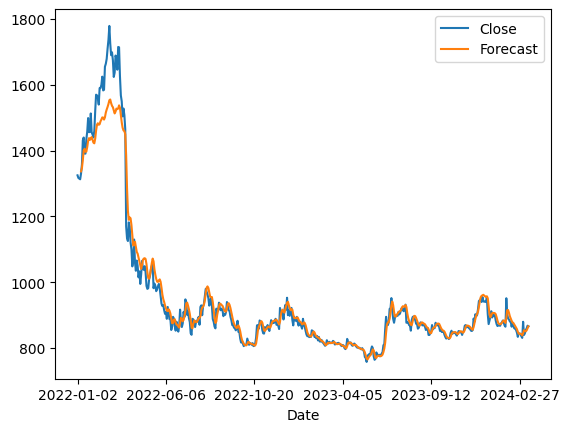

In [24]:
df_final.plot()

In [25]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create trace for 'Close' data
trace_close = go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close')

# Create trace for 'Forecast' data
trace_forecast = go.Scatter(x=df.index, y=df['Forecast'], mode='lines', name='Forecast')

# Create layout
layout = go.Layout(title='Close vs Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

# Create figure with both traces
fig = go.Figure(data=[trace_close, trace_forecast], layout=layout)

# Plot the figure
pyo.iplot(fig)
